In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import glob, os

%matplotlib inline

In [3]:
def labelGray2Color(image, color_class):
    label_color = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)
    label_color[image == 0]    = color_class[0]
    label_color[image == color*1] = color_class[1]
    label_color[image == color*2] = color_class[2]
    label_color[image == color*3] = color_class[3]
    label_color[image == color*4] = color_class[4]
    return label_color

def get_y( path ):
    grayscale = read_image( path, 'gray' ) / color
    layers = [  (grayscale == i) + [0] for i in range(0, num_classes) ]   
    return np.stack( layers, axis=2 ).astype( np.float32 )

def get_image( path ):
    return cv2.imread(path, cv2.IMREAD_GRAYSCALE)

def resize_image(image, size):
    return cv2.resize(image, size, interpolation=cv2.INTER_NEAREST)

def plot_sample(title, original, label1=None, label2=None):
    
    raw_label1 = label1.copy()
    raw_label2 = label2.copy()
    
    def mergeLabelPred( label, predict):
        label_color = np.zeros((label.shape[0], label.shape[1], 3), dtype=np.uint8)
        label_color[label > 0] = 80
        label_color[label != predict] = 255
        return label_color
    
    figSize = 3
    if label1: figSize += 1
    if label2: figSize += 1
    
    f, ax = plt.subplots( 1, figSize, figsize=(24,15) )
    f.suptitle( title )

    ax[0].set_title('original')
    ax[0].imshow(original)
    
    if label1:
        ax[1].set_title('label1')
        ax[1].imshow( labelGray2Color(label1, color_class) )

    if labebl2:
        ax[2].set_title('Label')
        ax[2].imshow(labelGray2Color(label2, color_class))
    
    if label1 and label2:
        mergeLabelPred = mergeLabelPred( raw_label1, raw_label2)
        ax[figSize - 2].set_title('pred vs label IoU')
        ax[figSize - 2].imshow( mergeLabelPred )
    
#     a4.set_title('pred vs label IoU')
#     a4.imshow( mergeLabelPred )
    
#     a4.set_title('pred vs label IoU')
#     a4.imshow( mergeLabelPred )
    
#     a4.set_title('pred vs label IoU')
#     a4.imshow( mergeLabelPred )
    
    
    re_color_class = color_class
    re_color_class = np.reshape(color_class, (5, 1, 3))
    
    ax[figSize - 1].set(yticks=np.arange(6), yticklabels=tmp_labels, title='Class Color')
    ax[figSize - 1].get_xaxis().set_ticks([])
    ax[figSize - 1].imshow(re_color_class, interpolation='nearest')
    return f

In [4]:
def getDirName(fullDirPath):
    dirName = fullDirPath.split(os.sep)[-1]
    splitDirName = dirName.split("_")
    resultDirName = splitDirName[0] + "_" + splitDirName[1]

    return resultDirName

def getNameFromDirs(path):
    allDirs = [getDirName(fullDirPath) for fullDirPath in glob.glob(os.path.join(path, '*'))]

    return sorted(list(set(allDirs)))

def getNameImageInList(path, nameImageList):
    resultNameImage = []
    for nameImage in nameImageList: 
        dirNames = []
        
        for fullDirPath in glob.glob(os.path.join(path, '*')):
            dirName = fullDirPath.split(os.sep)[-1]
            
            if nameImage in dirName:
                dirNames.append(dirName)
           
        resultNameImage.append(dirNames)
    return resultNameImage

In [5]:
def getImageInDir(imageDir):
    return glob.glob(testImageDir)

def mockUser(size=5):
    return ["uid_%s" % (str(uid).zfill(3)) for uid in range(1, size + 1)]

def createDir(path_dir):
    if not os.path.exists(path_dir):
        os.makedirs(path_dir)

In [8]:
color_class = [(0, 0, 0), (128, 0, 64), (230, 0, 0),  (255, 255, 102), (255, 153, 102)]
tmp_labels  = ['background', 'necrosis', 'granulation', 'slough', 'epithelial']
color         = 63
num_classes   = 5

root        = os.getcwd()
root_path = os.path.join(root, 'data/multimask_rev2_split_file')
imageFullPathList = glob.glob(os.path.join(root_path, '*'))

# training        = os.path.join(root, "data", "compare")
training        = os.path.join(root, "data", "compare_repair")

training_feature_dir = os.path.join(training, "feature")
training_label_dir   = os.path.join(training, "label")

compare_repair = os.path.join(root, 'data/compare_repair', "fill_label")

# result_dir         = os.path.join(root, "compare_result")
# export_summary_dir = os.path.join(result_dir, 'log')
# export_figure_dir = os.path.join(result_dir, 'figure')


# createDir(result_dir)
# createDir(export_summary_dir)
# createDir(export_figure_dir)

In [18]:
def getDirName(fullDirPath):
    dirName = fullDirPath.split(os.sep)[-1]
    splitDirName = dirName.split("_")
    resultDirName = splitDirName[0] + "_" + splitDirName[1]

    return resultDirName

def getNameFromDirs(path):
    allDirs = [getDirName(fullDirPath) for fullDirPath in glob.glob(os.path.join(path, '*'))]

    return sorted(list(set(allDirs)))

def getNameImageInList(path, nameImageList):
    resultNameImage = []
    for nameImage in nameImageList: 
        dirNames = []
        for fullDirPath in glob.glob(os.path.join(path, '*')):
            dirName = fullDirPath.split(os.sep)[-1]
            if nameImage in dirName:
                dirNames.append(dirName)
        resultNameImage.append(sorted(dirNames))
    return resultNameImage

def getImageDir(imagePath, file_type = "png"):
    imageDir = os.path.join(training_label_dir, imagePath, "{}.{}".format(imagePath,file_type))
    return glob.glob(imageDir)[0]

nameImageList = getNameFromDirs(training_label_dir)
nameImages    = getNameImageInList(training_label_dir, nameImageList)

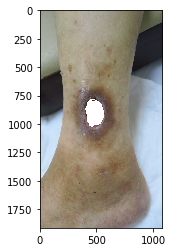

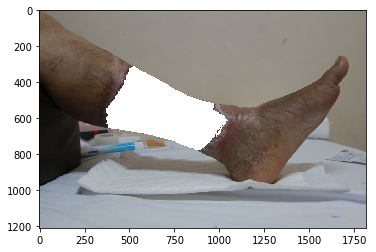

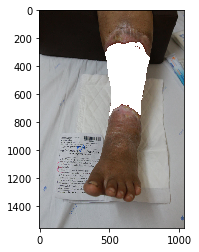

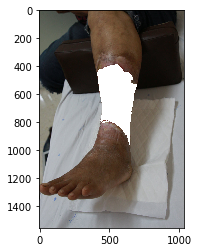

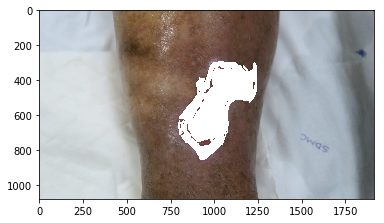

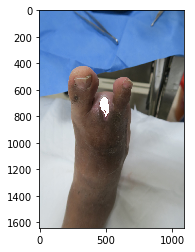

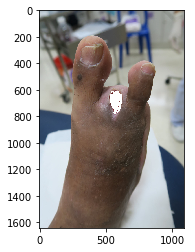

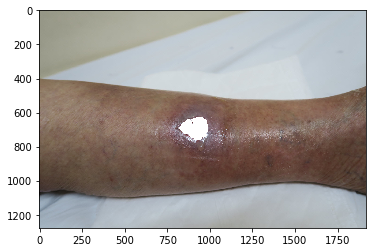

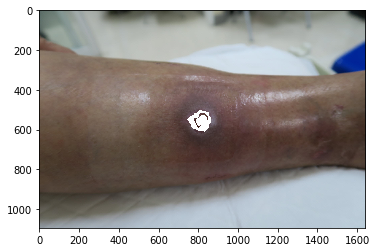

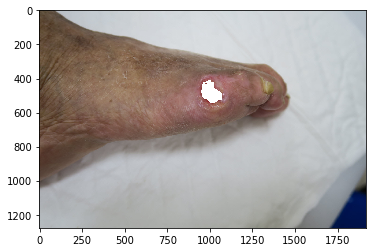

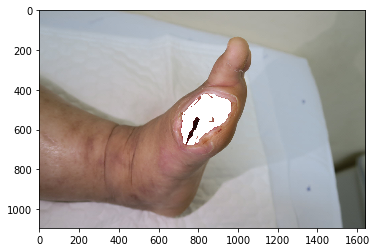

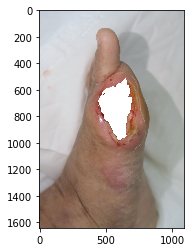

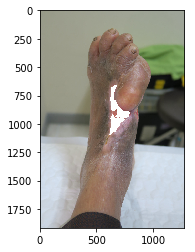

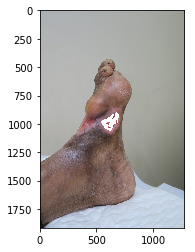

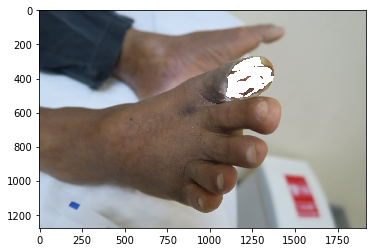

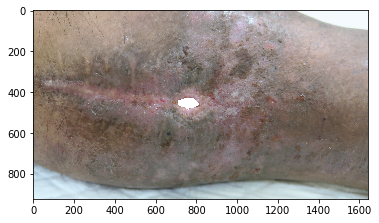

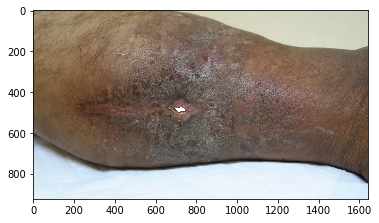

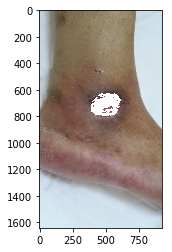

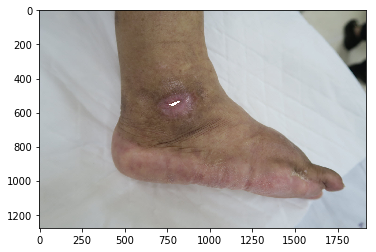

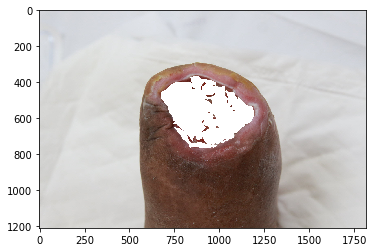

In [24]:
def mergeAndLabelColorImage(original, label):
    mergeImage = original.copy()
    notFillImage = original.copy()
    
    notFillImage[label != 0] = (255,255,255)
#     label = cv2.cvtColor(label,cv2.COLOR_GRAY2RGB)
    colorClass = np.unique(label)
#     print("labelClass", colorClass)
    
    for index, color in enumerate(color_class):
        if index != 0:
#             print(index, color)
            mergeImage[label == index] = color
#             plt.imshow(mergeImage)
#             plt.show()
    return mergeImage, notFillImage
 
def writeMergeImage(path, imageName, image):
#     print(path, imageName)
    imageComparePath = os.path.join(compare_repair, path)
    createDir(imageComparePath)
    cv2.imwrite(os.path.join(imageComparePath, "{}.png".format(imageName)), cv2.cvtColor(image, cv2.COLOR_RGB2BGR))

for index, nameImage in enumerate(nameImages[:20]):    
    user1 = 0
    user2 = 1
    user3 = 2
    
    imageId = getDirName(getImageDir(nameImage[user1])).split('.')[0]
    originalImagePath = os.path.join(root_path, imageId, "{}.JPG".format(imageId))
    if os.path.exists(originalImagePath):
#         print(originalImagePath)
        originalImage = cv2.cvtColor(cv2.imread(originalImagePath), cv2.COLOR_BGR2RGB)
#         plt.imshow(originalImage)
#         plt.show()
    else:
        print("file not exitst", originalImagePath)
        continue
        
    image1 = getImageDir(nameImage[user1])
    image2 = getImageDir(nameImage[user2])
    image3 = getImageDir(nameImage[user3])

#     print("image1", image1)
#     print("image2", image2)
#     print("image3", image3)

    image1 = get_image(image1) // 63
    image2 = get_image(image2) // 63
    image3 = get_image(image3) // 63

    mergeImage1, notFillImage1 = mergeAndLabelColorImage(originalImage, image1)
    mergeImage2, notFillImage2 = mergeAndLabelColorImage(originalImage, image2)
    mergeImage3, notFillImage3 = mergeAndLabelColorImage(originalImage, image3)
    
    writeMergeImage(imageId, "original", originalImage)
    writeMergeImage(imageId, nameImage[user1], mergeImage1)
    writeMergeImage(imageId, nameImage[user2], mergeImage2)
    writeMergeImage(imageId, nameImage[user3], mergeImage3)
    
    writeMergeImage(imageId, "BG-{}".format(nameImage[user1]), notFillImage1)
    writeMergeImage(imageId, "BG-{}".format(nameImage[user2]), notFillImage2)
    writeMergeImage(imageId, "BG-{}".format(nameImage[user3]), notFillImage3)
#     plt.imshow(mergeImage1)
#     plt.show()
    plt.imshow(notFillImage1)
    plt.show()
#     plt.imshow(get_image(image1), cmap='gray')
#     imageId = getDirName(image1).split('.')[0]